In [96]:
import pandas as pd
import numpy as np

# load the 'usa_00009' data
df = pd.read_csv('./usa_00009.csv', index_col=0).dropna()

# show information about the dataframe
df.info()

print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6404579 entries, 2017 to 2018
Data columns (total 25 columns):
 #   Column    Dtype  
---  ------    -----  
 0   SAMPLE    int64  
 1   SERIAL    int64  
 2   CBSERIAL  int64  
 3   HHWT      float64
 4   CLUSTER   int64  
 5   STRATA    int64  
 6   GQ        int64  
 7   PERNUM    int64  
 8   PERWT     float64
 9   SEX       int64  
 10  AGE       int64  
 11  RACE      int64  
 12  RACED     int64  
 13  HCOVANY   int64  
 14  EDUC      int64  
 15  EDUCD     int64  
 16  INCTOT    int64  
 17  DIFFSENS  int64  
 18  PWSTATE2  int64  
 19  PWCOUNTY  int64  
 20  TRANWORK  int64  
 21  CARPOOL   int64  
 22  TRANTIME  int64  
 23  DEPARTS   int64  
 24  ARRIVES   int64  
dtypes: float64(2), int64(23)
memory usage: 1.2 GB




SAMPLE  SERIAL       CBSERIAL   HHWT        CLUSTER  STRATA  GQ  PERNUM  \
YEAR                                                                            
2017  201701       1  2017000000016  206.0  2017000000011  250001   1       1   
2017  201701       2  2017000000031   45.0  2017000000021  180001   1       1   
2017  201701       3  2017000000061  136.0  2017000000031  240001   1       1   
2017  201701       3  2017000000061  136.0  2017000000031  240001   1       2   
2017  201701       3  2017000000061  136.0  2017000000031  240001   1       3   

      PERWT  SEX  ...  EDUCD  INCTOT  DIFFSENS  PWSTATE2  PWCOUNTY  TRANWORK  \
YEAR              ...                                                          
2017  206.0    1  ...     25   10000         1         0         0         0   
2017   45.0    2  ...    101   38500         1         1       117        10   
2017  136.0    1  ...     64   82000         1        13         0        10   
2017  121.0    2  ...     63    8700         1         0         0         0   
2017  111.0    1  ...     40       0         1         0         0         0   

      CARPOOL  TRANTIME  DEPARTS  ARRIVES  
YEAR                                       
2017        0         0        0        0  
2017        1        50      642      734  
2017        1        45     1805     1849  
2017        0         0        0        0  
2017        0         0        0        0  

[5 rows x 25 columns]

In [97]:
# check for duplicate columns
print(df.columns.duplicated())

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


In [98]:
# drop constant columns
df = df.loc[:, (df != df.iloc[0]).any()]

In [99]:
# drop highly correlated columns
corr_matrix = df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df = df.drop(to_drop, axis=1)

C:\Users\18177\AppData\Local\Temp\ipykernel_28348\1460545617.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [100]:
df.info()

print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6404579 entries, 2017 to 2018
Data columns (total 20 columns):
 #   Column    Dtype  
---  ------    -----  
 0   SAMPLE    int64  
 1   SERIAL    int64  
 2   HHWT      float64
 3   STRATA    int64  
 4   GQ        int64  
 5   PERNUM    int64  
 6   PERWT     float64
 7   SEX       int64  
 8   AGE       int64  
 9   RACE      int64  
 10  HCOVANY   int64  
 11  EDUC      int64  
 12  INCTOT    int64  
 13  DIFFSENS  int64  
 14  PWSTATE2  int64  
 15  PWCOUNTY  int64  
 16  TRANWORK  int64  
 17  CARPOOL   int64  
 18  TRANTIME  int64  
 19  DEPARTS   int64  
dtypes: float64(2), int64(18)
memory usage: 1.0 GB




SAMPLE  SERIAL   HHWT  STRATA  GQ  PERNUM  PERWT  SEX  AGE  RACE  \
YEAR                                                                     
2017  201701       1  206.0  250001   1       1  206.0    1   73     2   
2017  201701       2   45.0  180001   1       1   45.0    2   31     1   
2017  201701       3  136.0  240001   1       1  136.0    1   41     1   
2017  201701       3  136.0  240001   1       2  121.0    2   48     1   
2017  201701       3  136.0  240001   1       3  111.0    1   16     1   

      HCOVANY  EDUC  INCTOT  DIFFSENS  PWSTATE2  PWCOUNTY  TRANWORK  CARPOOL  \
YEAR                                                                           
2017        2     2   10000         1         0         0         0        0   
2017        2    10   38500         1         1       117        10        1   
2017        2     6   82000         1        13         0        10        1   
2017        2     6    8700         1         0         0         0        0   
2017        2     4       0         1         0         0         0        0   

      TRANTIME  DEPARTS  
YEAR                     
2017         0        0  
2017        50      642  
2017        45     1805  
2017         0        0  
2017         0        0

In [101]:
# filter the data to keep only records where state is Arizona
df = df[df['PWSTATE2'] == 4]

df.info()

print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57581 entries, 2017 to 2018
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAMPLE    57581 non-null  int64  
 1   SERIAL    57581 non-null  int64  
 2   HHWT      57581 non-null  float64
 3   STRATA    57581 non-null  int64  
 4   GQ        57581 non-null  int64  
 5   PERNUM    57581 non-null  int64  
 6   PERWT     57581 non-null  float64
 7   SEX       57581 non-null  int64  
 8   AGE       57581 non-null  int64  
 9   RACE      57581 non-null  int64  
 10  HCOVANY   57581 non-null  int64  
 11  EDUC      57581 non-null  int64  
 12  INCTOT    57581 non-null  int64  
 13  DIFFSENS  57581 non-null  int64  
 14  PWSTATE2  57581 non-null  int64  
 15  PWCOUNTY  57581 non-null  int64  
 16  TRANWORK  57581 non-null  int64  
 17  CARPOOL   57581 non-null  int64  
 18  TRANTIME  57581 non-null  int64  
 19  DEPARTS   57581 non-null  int64  
dtypes: float64(2), int64(18)
m

SAMPLE  SERIAL   HHWT  STRATA  GQ  PERNUM  PERWT  SEX  AGE  RACE  \
YEAR                                                                     
2017  201701   17921  285.0  200001   1       1  285.0    1   32     1   
2017  201701   24836   75.0   80004   1       1   75.0    1   31     1   
2017  201701   24837  112.0   80504   1       1  112.0    2   33     1   
2017  201701   24839  219.0   30004   1       1  219.0    1   45     1   
2017  201701   24839  219.0   30004   1       2  296.0    1   38     1   

      HCOVANY  EDUC  INCTOT  DIFFSENS  PWSTATE2  PWCOUNTY  TRANWORK  CARPOOL  \
YEAR                                                                           
2017        2    10   20020         1         4        13        70        0   
2017        2     7   10000         1         4         0        10        1   
2017        2     6   22400         1         4        13        10        1   
2017        2     2   10000         1         4         0        10        1   
2017        1     6    8000         1         4         0        10        1   

      TRANTIME  DEPARTS  
YEAR                     
2017       126      702  
2017         6     1435  
2017       123      637  
2017         5      542  
2017        60      802

In [102]:
df = df.drop(['STRATA','GQ'], axis=1)

df.info()

print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57581 entries, 2017 to 2018
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAMPLE    57581 non-null  int64  
 1   SERIAL    57581 non-null  int64  
 2   HHWT      57581 non-null  float64
 3   PERNUM    57581 non-null  int64  
 4   PERWT     57581 non-null  float64
 5   SEX       57581 non-null  int64  
 6   AGE       57581 non-null  int64  
 7   RACE      57581 non-null  int64  
 8   HCOVANY   57581 non-null  int64  
 9   EDUC      57581 non-null  int64  
 10  INCTOT    57581 non-null  int64  
 11  DIFFSENS  57581 non-null  int64  
 12  PWSTATE2  57581 non-null  int64  
 13  PWCOUNTY  57581 non-null  int64  
 14  TRANWORK  57581 non-null  int64  
 15  CARPOOL   57581 non-null  int64  
 16  TRANTIME  57581 non-null  int64  
 17  DEPARTS   57581 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 8.3 MB




SAMPLE  SERIAL   HHWT  PERNUM  PERWT  SEX  AGE  RACE  HCOVANY  EDUC  \
YEAR                                                                        
2017  201701   17921  285.0       1  285.0    1   32     1        2    10   
2017  201701   24836   75.0       1   75.0    1   31     1        2     7   
2017  201701   24837  112.0       1  112.0    2   33     1        2     6   
2017  201701   24839  219.0       1  219.0    1   45     1        2     2   
2017  201701   24839  219.0       2  296.0    1   38     1        1     6   

      INCTOT  DIFFSENS  PWSTATE2  PWCOUNTY  TRANWORK  CARPOOL  TRANTIME  \
YEAR                                                                      
2017   20020         1         4        13        70        0       126   
2017   10000         1         4         0        10        1         6   
2017   22400         1         4        13        10        1       123   
2017   10000         1         4         0        10        1         5   
2017    8000         1         4         0        10        1        60   

      DEPARTS  
YEAR           
2017      702  
2017     1435  
2017      637  
2017      542  
2017      802

In [103]:
import matplotlib as plt

df.describe()


SAMPLE        SERIAL          HHWT        PERNUM         PERWT  \
count   57581.000000  5.758100e+04  57581.000000  57581.000000  57581.000000   
mean   201751.398569  4.490621e+04    100.534968      1.718588    107.681301   
std        49.998846  6.683338e+04     71.910715      1.059976     79.817945   
min    201701.000000  6.641000e+03      2.000000      1.000000      2.000000   
25%    201701.000000  3.311200e+04     59.000000      1.000000     61.000000   
50%    201801.000000  3.991200e+04     78.000000      1.000000     83.000000   
75%    201801.000000  4.688400e+04    118.000000      2.000000    126.000000   
max    201801.000000  1.407691e+06   1134.000000     17.000000   1289.000000   

                SEX           AGE          RACE       HCOVANY          EDUC  \
count  57581.000000  57581.000000  57581.000000  57581.000000  57581.000000   
mean       1.472395     42.962696      1.858182      1.896667      7.620396   
std        0.499242     14.829065      1.955425      0.304396      2.294241   
min        1.000000     16.000000      1.000000      1.000000      0.000000   
25%        1.000000     30.000000      1.000000      2.000000      6.000000   
50%        1.000000     43.000000      1.000000      2.000000      7.000000   
75%        2.000000     55.000000      1.000000      2.000000     10.000000   
max        2.000000     93.000000      9.000000      2.000000     11.000000   

              INCTOT      DIFFSENS  PWSTATE2      PWCOUNTY      TRANWORK  \
count   57581.000000  57581.000000   57581.0  57581.000000  57581.000000   
mean    54485.656258      1.033674       4.0     12.852312     17.454247   
std     62459.706712      0.180391       0.0      5.803225     20.197048   
min     -5700.000000      1.000000       4.0      0.000000     10.000000   
25%     21000.000000      1.000000       4.0     13.000000     10.000000   
50%     39000.000000      1.000000       4.0     13.000000     10.000000   
75%     65000.000000      1.000000       4.0     13.000000     10.000000   
max    998000.000000      2.000000       4.0     27.000000     80.000000   

            CARPOOL      TRANTIME       DEPARTS  
count  57581.000000  57581.000000  57581.000000  
mean       0.975669     24.100137    750.148782  
std        0.491061     21.468842    410.602651  
min        0.000000      0.000000      0.000000  
25%        1.000000     10.000000    602.000000  
50%        1.000000     20.000000    702.000000  
75%        1.000000     30.000000    832.000000  
max        2.000000    161.000000   2345.000000

In [104]:
df = df.drop(['SERIAL'], axis=1)


In [105]:
df.describe()

SAMPLE          HHWT        PERNUM         PERWT           SEX  \
count   57581.000000  57581.000000  57581.000000  57581.000000  57581.000000   
mean   201751.398569    100.534968      1.718588    107.681301      1.472395   
std        49.998846     71.910715      1.059976     79.817945      0.499242   
min    201701.000000      2.000000      1.000000      2.000000      1.000000   
25%    201701.000000     59.000000      1.000000     61.000000      1.000000   
50%    201801.000000     78.000000      1.000000     83.000000      1.000000   
75%    201801.000000    118.000000      2.000000    126.000000      2.000000   
max    201801.000000   1134.000000     17.000000   1289.000000      2.000000   

                AGE          RACE       HCOVANY          EDUC         INCTOT  \
count  57581.000000  57581.000000  57581.000000  57581.000000   57581.000000   
mean      42.962696      1.858182      1.896667      7.620396   54485.656258   
std       14.829065      1.955425      0.304396      2.294241   62459.706712   
min       16.000000      1.000000      1.000000      0.000000   -5700.000000   
25%       30.000000      1.000000      2.000000      6.000000   21000.000000   
50%       43.000000      1.000000      2.000000      7.000000   39000.000000   
75%       55.000000      1.000000      2.000000     10.000000   65000.000000   
max       93.000000      9.000000      2.000000     11.000000  998000.000000   

           DIFFSENS  PWSTATE2      PWCOUNTY      TRANWORK       CARPOOL  \
count  57581.000000   57581.0  57581.000000  57581.000000  57581.000000   
mean       1.033674       4.0     12.852312     17.454247      0.975669   
std        0.180391       0.0      5.803225     20.197048      0.491061   
min        1.000000       4.0      0.000000     10.000000      0.000000   
25%        1.000000       4.0     13.000000     10.000000      1.000000   
50%        1.000000       4.0     13.000000     10.000000      1.000000   
75%        1.000000       4.0     13.000000     10.000000      1.000000   
max        2.000000       4.0     27.000000     80.000000      2.000000   

           TRANTIME       DEPARTS  
count  57581.000000  57581.000000  
mean      24.100137    750.148782  
std       21.468842    410.602651  
min        0.000000      0.000000  
25%       10.000000    602.000000  
50%       20.000000    702.000000  
75%       30.000000    832.000000  
max      161.000000   2345.000000

<AxesSubplot:xlabel='AGE', ylabel='TRANTIME'>

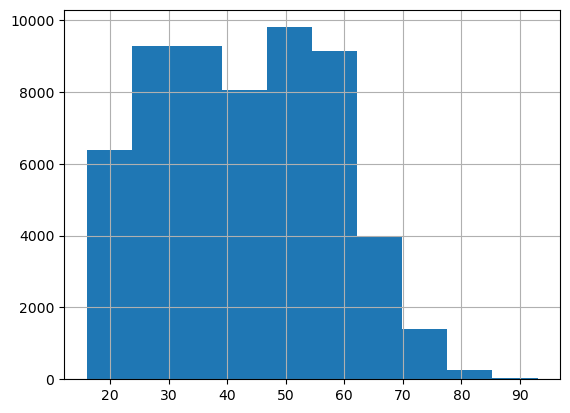

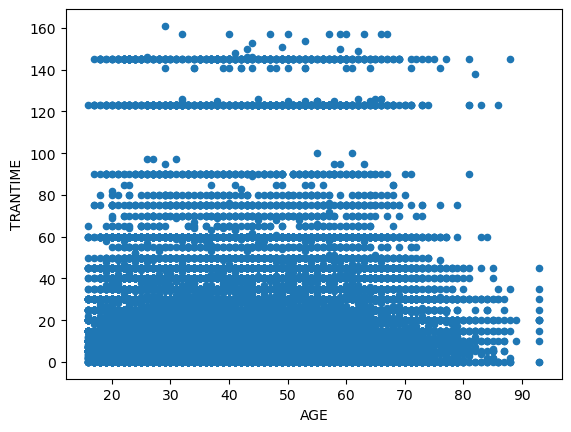

In [106]:
df['AGE'].hist()
df.plot(x='AGE', y='TRANTIME', kind='scatter')

<AxesSubplot:>

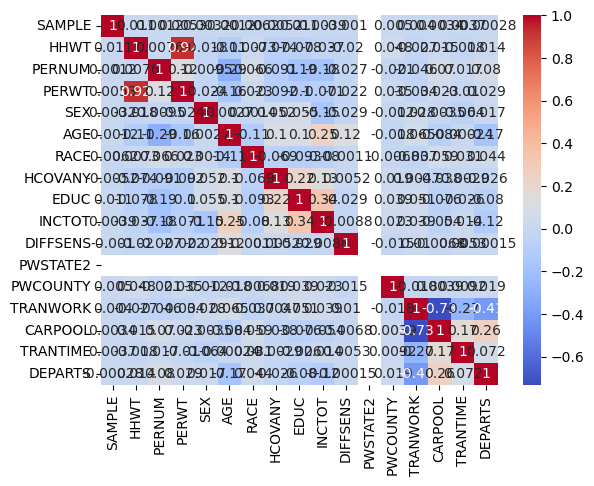

In [107]:
import seaborn as sns

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

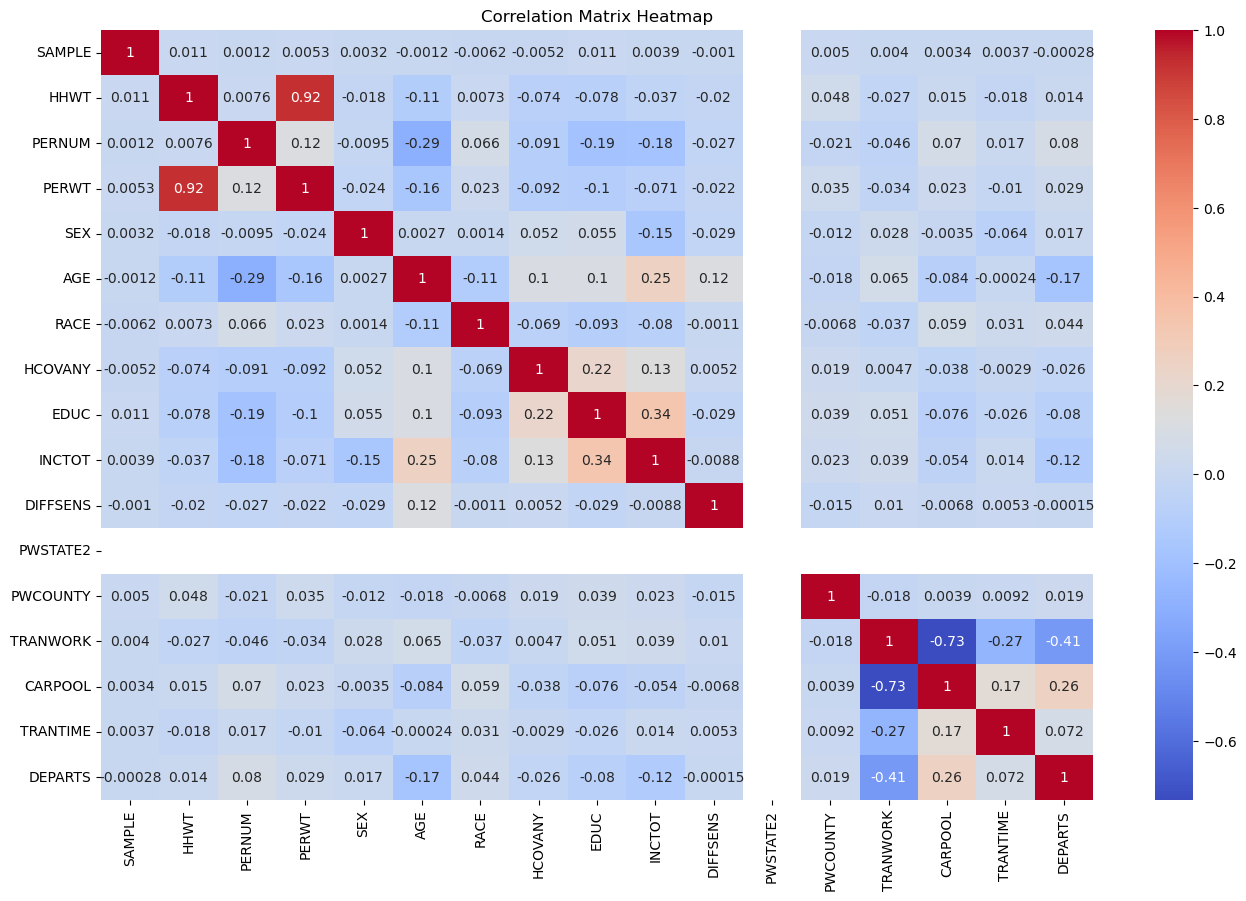

In [108]:
import matplotlib.pyplot as plot
# create a larger plot
plot.figure(figsize=(16,10))

# create the heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plot.title('Correlation Matrix Heatmap')
plot.show()

In [109]:
df.info()

print('\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57581 entries, 2017 to 2018
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAMPLE    57581 non-null  int64  
 1   HHWT      57581 non-null  float64
 2   PERNUM    57581 non-null  int64  
 3   PERWT     57581 non-null  float64
 4   SEX       57581 non-null  int64  
 5   AGE       57581 non-null  int64  
 6   RACE      57581 non-null  int64  
 7   HCOVANY   57581 non-null  int64  
 8   EDUC      57581 non-null  int64  
 9   INCTOT    57581 non-null  int64  
 10  DIFFSENS  57581 non-null  int64  
 11  PWSTATE2  57581 non-null  int64  
 12  PWCOUNTY  57581 non-null  int64  
 13  TRANWORK  57581 non-null  int64  
 14  CARPOOL   57581 non-null  int64  
 15  TRANTIME  57581 non-null  int64  
 16  DEPARTS   57581 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 7.9 MB




SAMPLE   HHWT  PERNUM  PERWT  SEX  AGE  RACE  HCOVANY  EDUC  INCTOT  \
YEAR                                                                        
2017  201701  285.0       1  285.0    1   32     1        2    10   20020   
2017  201701   75.0       1   75.0    1   31     1        2     7   10000   
2017  201701  112.0       1  112.0    2   33     1        2     6   22400   
2017  201701  219.0       1  219.0    1   45     1        2     2   10000   
2017  201701  219.0       2  296.0    1   38     1        1     6    8000   

      DIFFSENS  PWSTATE2  PWCOUNTY  TRANWORK  CARPOOL  TRANTIME  DEPARTS  
YEAR                                                                      
2017         1         4        13        70        0       126      702  
2017         1         4         0        10        1         6     1435  
2017         1         4        13        10        1       123      637  
2017         1         4         0        10        1         5      542  
2017         1         4         0        10        1        60      802

In [110]:
df = df.drop(['HHWT'], axis=1)


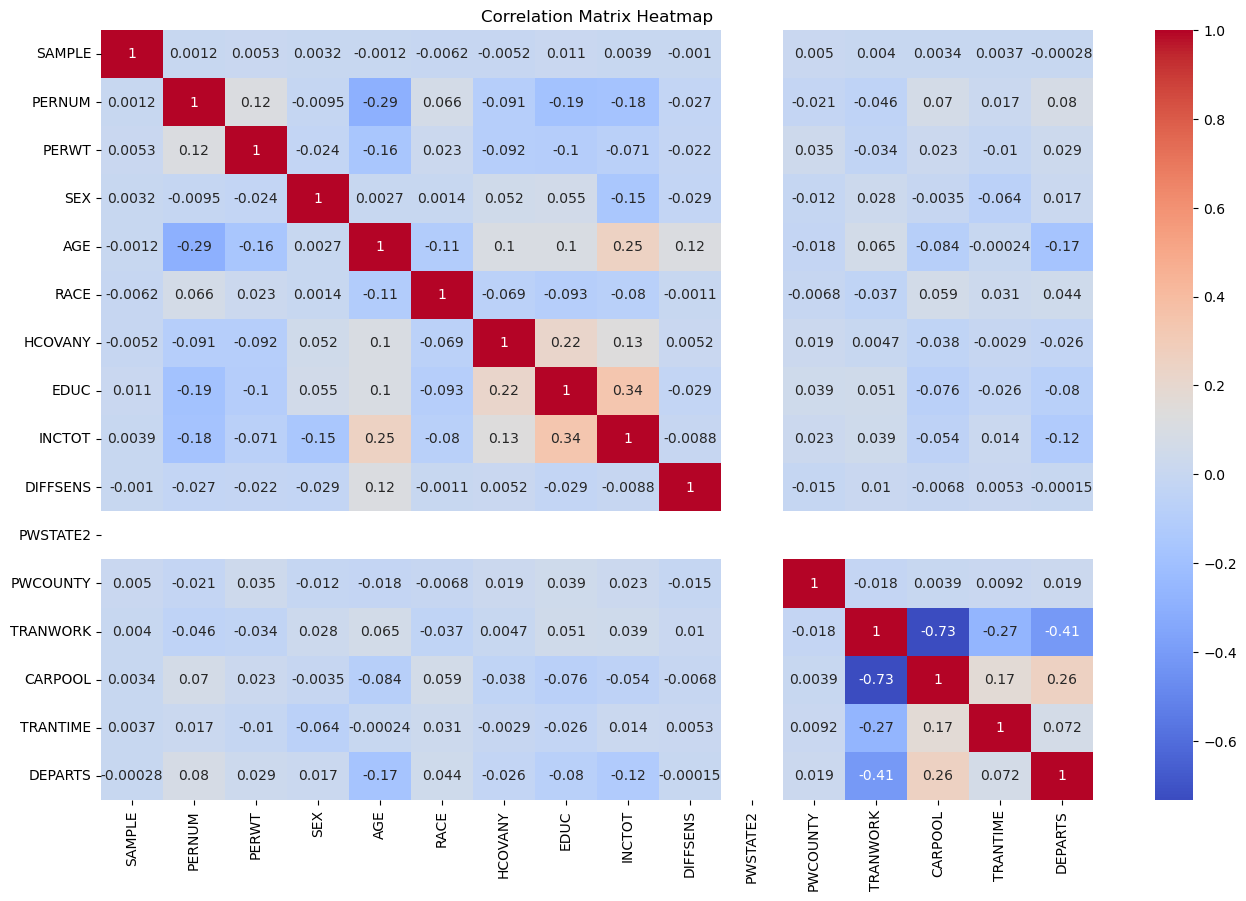

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57581 entries, 2017 to 2018
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SAMPLE    57581 non-null  int64  
 1   PERNUM    57581 non-null  int64  
 2   PERWT     57581 non-null  float64
 3   SEX       57581 non-null  int64  
 4   AGE       57581 non-null  int64  
 5   RACE      57581 non-null  int64  
 6   HCOVANY   57581 non-null  int64  
 7   EDUC      57581 non-null  int64  
 8   INCTOT    57581 non-null  int64  
 9   DIFFSENS  57581 non-null  int64  
 10  PWSTATE2  57581 non-null  int64  
 11  PWCOUNTY  57581 non-null  int64  
 12  TRANWORK  57581 non-null  int64  
 13  CARPOOL   57581 non-null  int64  
 14  TRANTIME  57581 non-null  int64  
 15  DEPARTS   57581 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 7.5 MB




SAMPLE        PERNUM         PERWT           SEX           AGE  \
count   57581.000000  57581.000000  57581.000000  57581.000000  57581.000000   
mean   201751.398569      1.718588    107.681301      1.472395     42.962696   
std        49.998846      1.059976     79.817945      0.499242     14.829065   
min    201701.000000      1.000000      2.000000      1.000000     16.000000   
25%    201701.000000      1.000000     61.000000      1.000000     30.000000   
50%    201801.000000      1.000000     83.000000      1.000000     43.000000   
75%    201801.000000      2.000000    126.000000      2.000000     55.000000   
max    201801.000000     17.000000   1289.000000      2.000000     93.000000   

               RACE       HCOVANY          EDUC         INCTOT      DIFFSENS  \
count  57581.000000  57581.000000  57581.000000   57581.000000  57581.000000   
mean       1.858182      1.896667      7.620396   54485.656258      1.033674   
std        1.955425      0.304396      2.294241   62459.706712      0.180391   
min        1.000000      1.000000      0.000000   -5700.000000      1.000000   
25%        1.000000      2.000000      6.000000   21000.000000      1.000000   
50%        1.000000      2.000000      7.000000   39000.000000      1.000000   
75%        1.000000      2.000000     10.000000   65000.000000      1.000000   
max        9.000000      2.000000     11.000000  998000.000000      2.000000   

       PWSTATE2      PWCOUNTY      TRANWORK       CARPOOL      TRANTIME  \
count   57581.0  57581.000000  57581.000000  57581.000000  57581.000000   
mean        4.0     12.852312     17.454247      0.975669     24.100137   
std         0.0      5.803225     20.197048      0.491061     21.468842   
min         4.0      0.000000     10.000000      0.000000      0.000000   
25%         4.0     13.000000     10.000000      1.000000     10.000000   
50%         4.0     13.000000     10.000000      1.000000     20.000000   
75%         4.0     13.000000     10.000000      1.000000     30.000000   
max         4.0     27.000000     80.000000      2.000000    161.000000   

            DEPARTS  
count  57581.000000  
mean     750.148782  
std      410.602651  
min        0.000000  
25%      602.000000  
50%      702.000000  
75%      832.000000  
max     2345.000000

In [111]:
# create a larger plot
plot.figure(figsize=(16,10))

# create the heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plot.title('Correlation Matrix Heatmap')
plot.show()

df.info()

print('\n')
df.head()

df.describe()

In [112]:
print(df['TRANWORK'].unique())

[70 10 80 50 32 60 36 20 35 38 39 37]


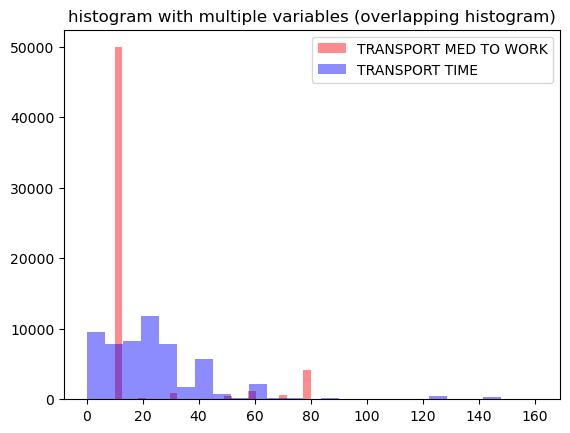

In [113]:
plot.hist(df['TRANWORK'], bins=25, alpha=0.45, color='red')
plot.hist(df['TRANTIME'], bins=25, alpha=0.45, color='blue')
  
plot.title("histogram with multiple \
variables (overlapping histogram)")
  
plot.legend(['TRANSPORT MED TO WORK', 
            'TRANSPORT TIME'])
  
plot.show()

<AxesSubplot:xlabel='TRANTIME', ylabel='TRANWORK'>

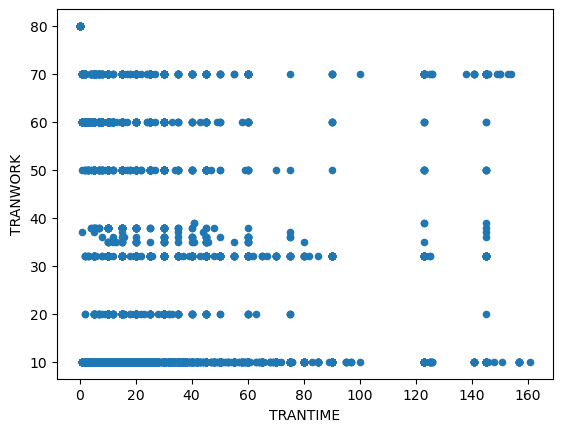

In [114]:
df.plot(x='TRANTIME', y='TRANWORK', kind='scatter')

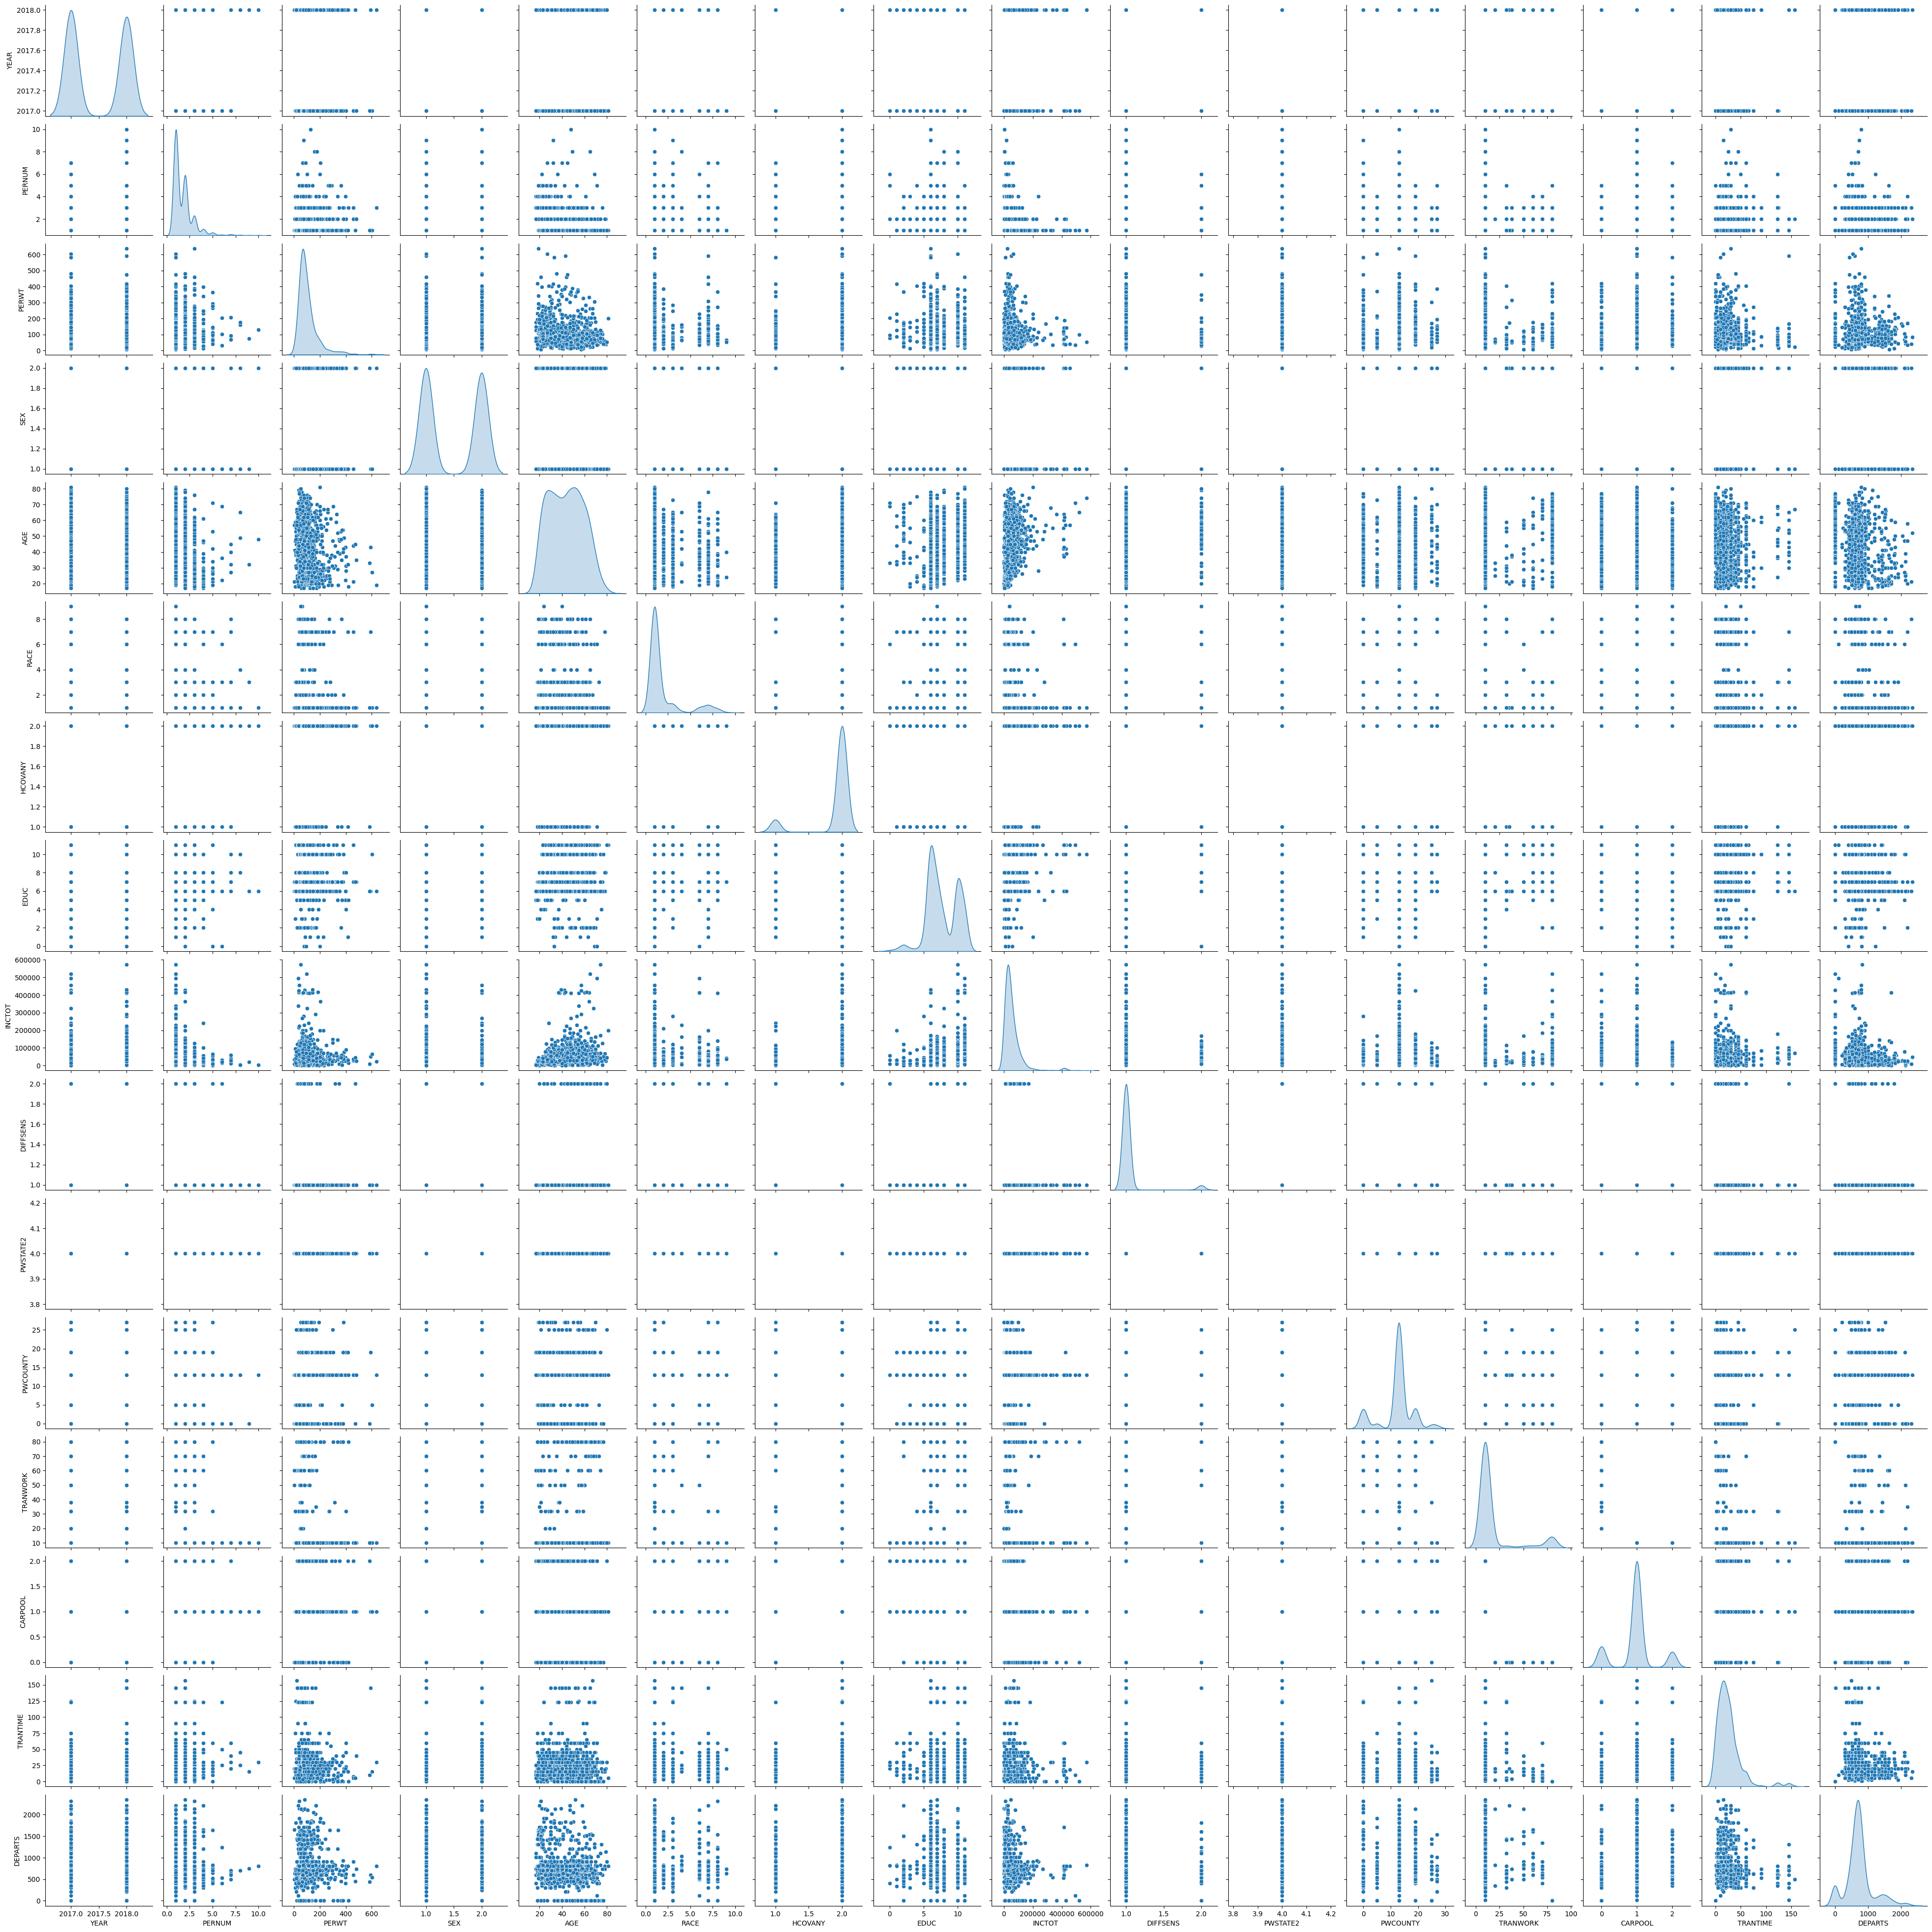

In [115]:
from IPython.display import Image
 
Image(filename='sns pairplot.png') # Show pairplot as image

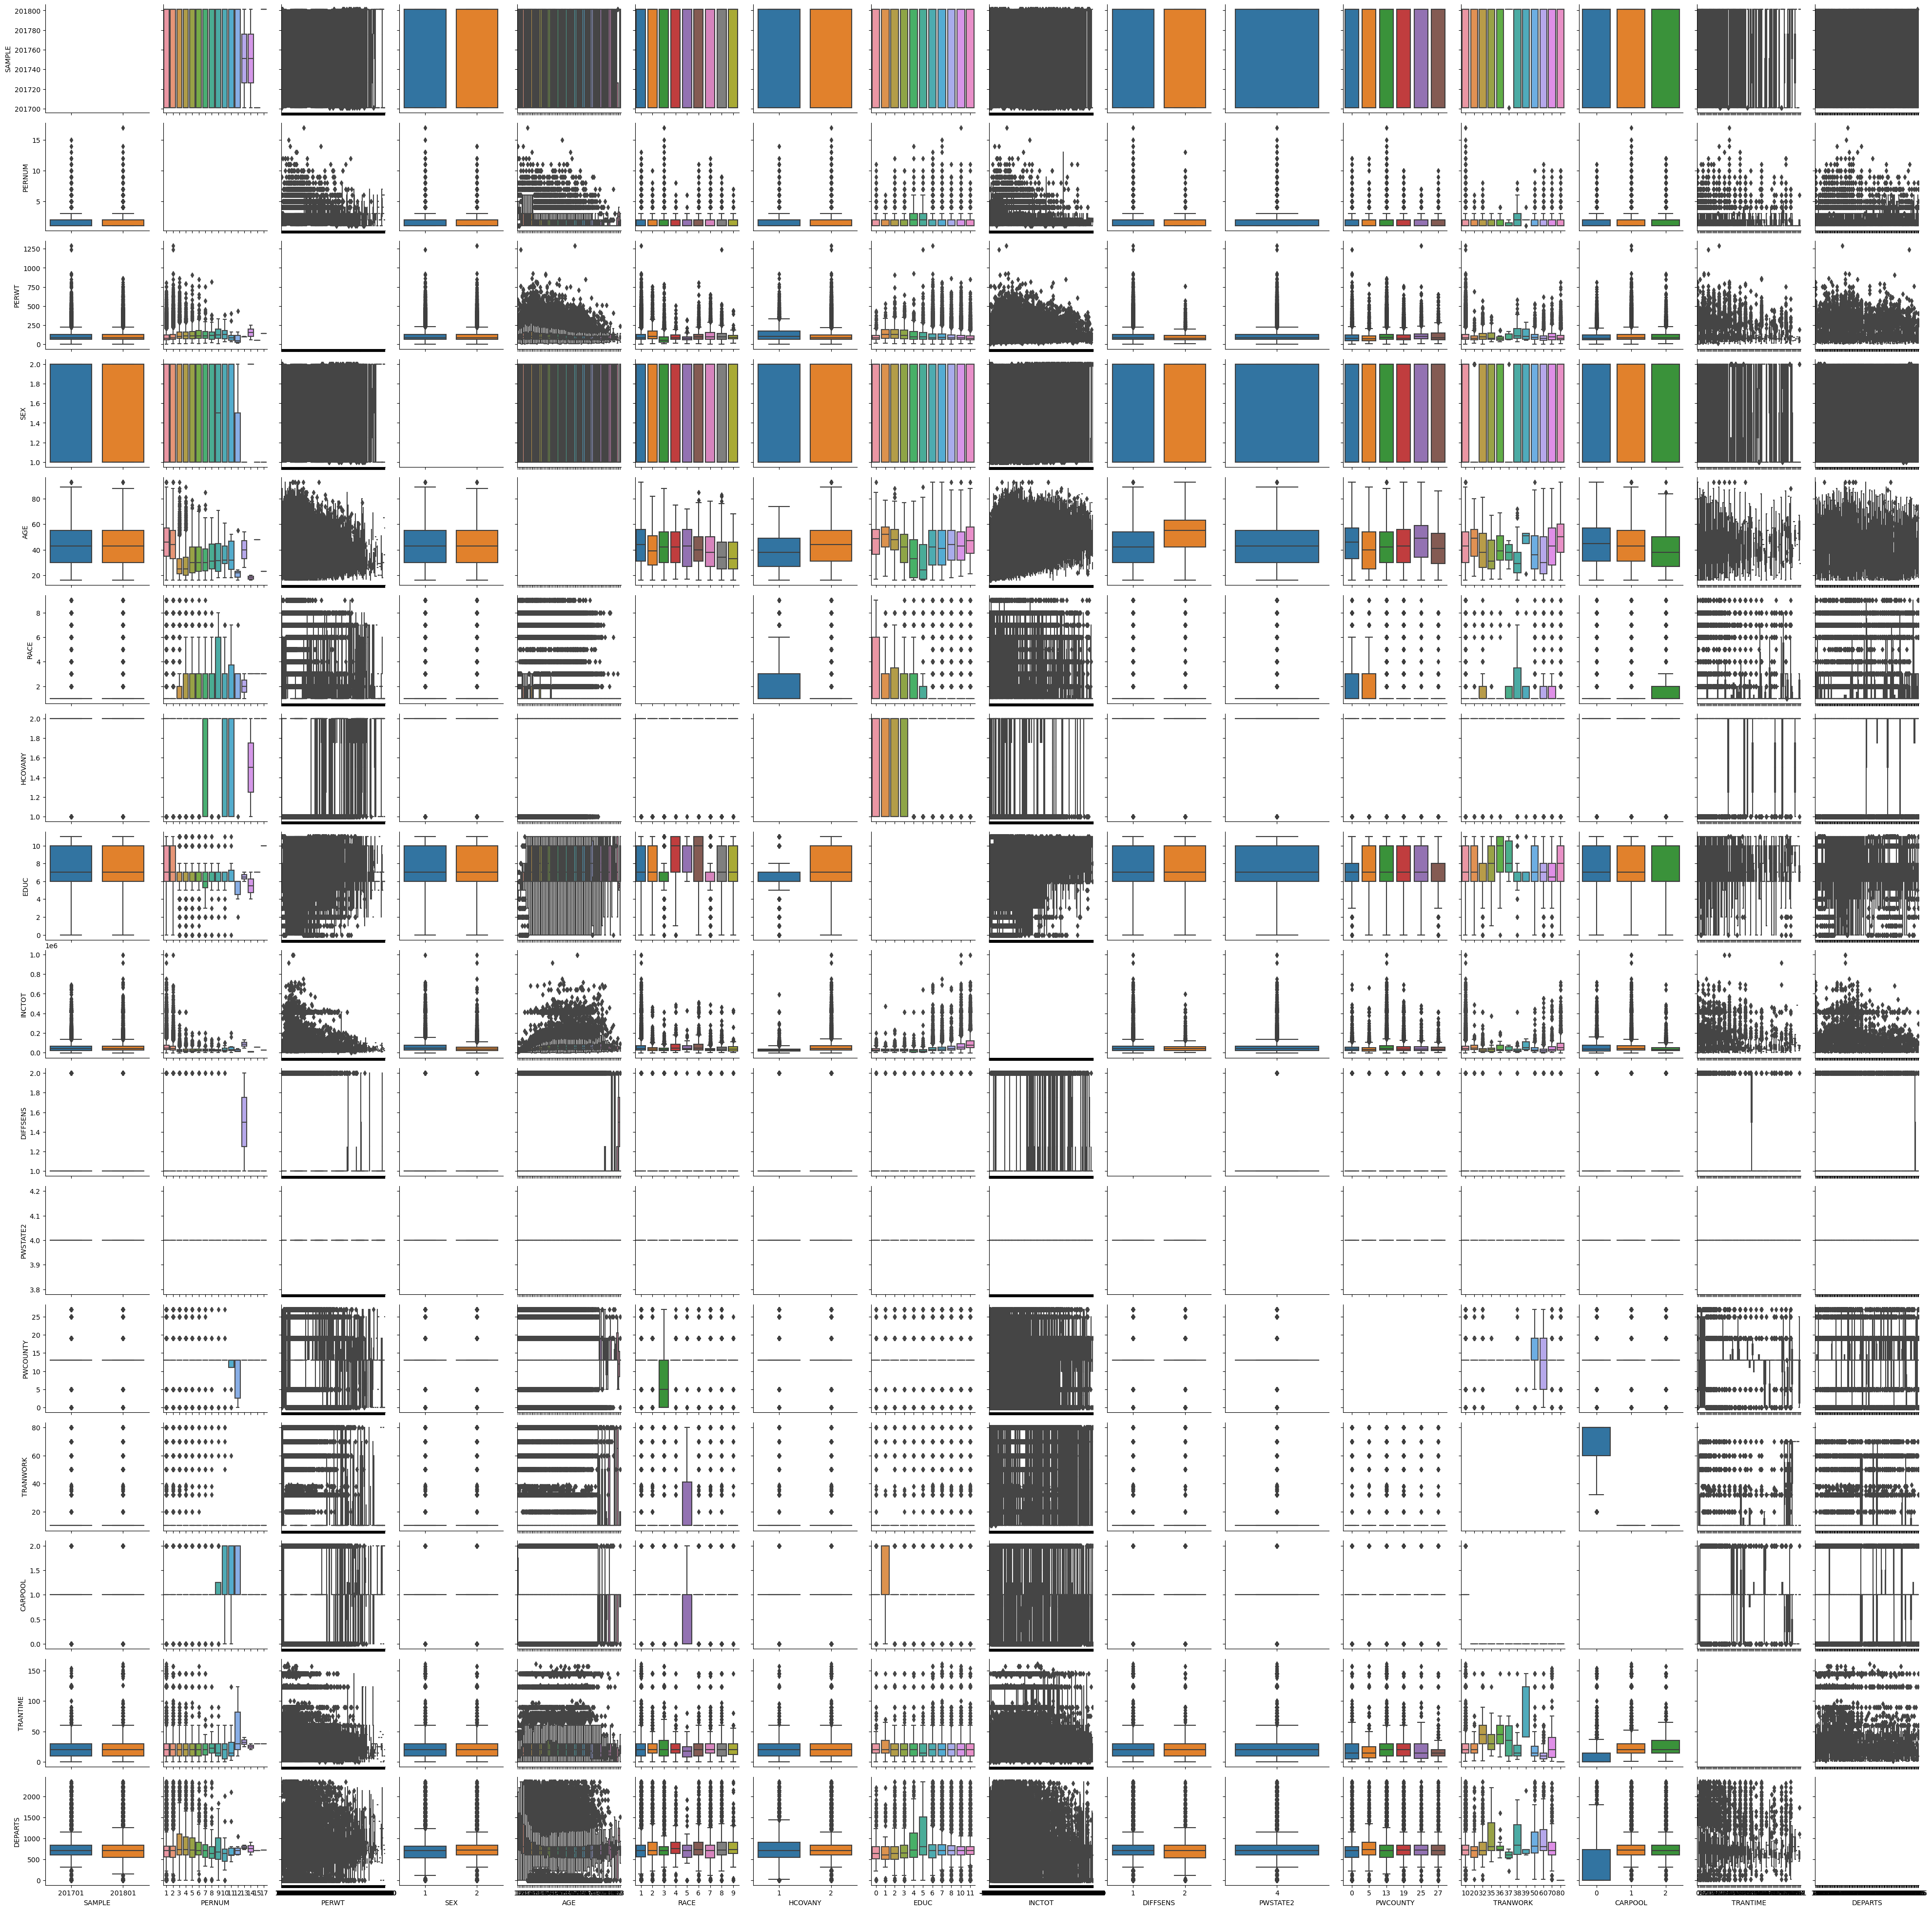

In [116]:
Image(filename='sns box plot.png')

<AxesSubplot:>

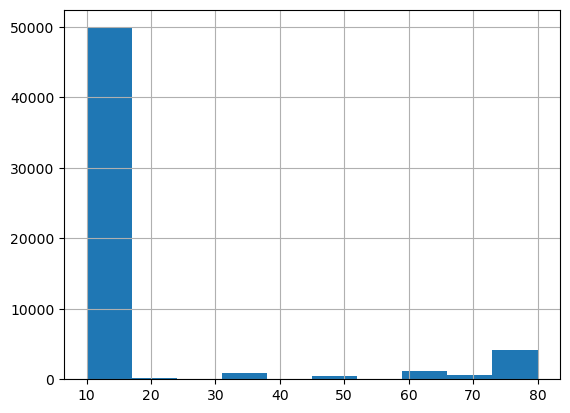

In [117]:
df['TRANWORK'].hist()


In [126]:

sns.boxplot(x='TRANWORK', y='INCOME', data=df)


ValueError: Could not interpret input 'INCOME'

In [24]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model and fit it to the data
X = df[['INCTOT', 'EDUC', 'CARPOOL']]
y = df['TRANTIME']
model = LinearRegression().fit(X, y)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.09028955e-05 -2.22862162e-01  7.49452250e+00]
Intercept: 17.89220991868291


In [68]:
import statsmodels.api as sm

# Define the dependent and independent variables
y = df['TRANWORK']
X = df[['AGE','INCTOT', 'EDUC', 'CARPOOL','DIFFSENS','HCOVANY','SEX']]

# Add a constant to the independent variables to include an intercept term in the regression
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TRANWORK   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     9619.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        07:53:18   Log-Likelihood:            -2.3247e+05
No. Observations:               57581   AIC:                         4.649e+05
Df Residuals:                   57573   BIC:                         4.650e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.6743      0.552     86.424      0.0

In [64]:
import numpy as np
#import pylab as pl
import pandas as pd
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score

y = df['TRANWORK']
X = df[['AGE', 'EDUC','DIFFSENS', 'CARPOOL','HCOVANY','SEX']]
logitm = LogisticRegression(C = 10000000,solver='lbfgs',multi_class='ovr', max_iter=10000)
logitm.fit(X, y)
yhat = logitm.predict_proba(X)
auc_score = roc_auc_score(pd.get_dummies(y).values, yhat, multi_class='ovr')
print(auc_score)

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)



0.9662282739511868
Estimated beta1: 
 [[-5.65450945e-02 -6.45530299e-02 -2.37119115e+00  5.07644140e+01
  -4.11178634e+00 -6.65173452e+00]
 [ 7.80814491e-03 -5.00892037e-02  3.93237975e-02 -1.30751766e+01
   3.75940146e-01 -1.76276483e+00]
 [-1.40277576e-02 -1.87927564e-01 -3.98667647e-02 -1.53542209e+01
  -3.13225264e-01 -1.08146719e-01]
 [-3.76382178e-02  1.23116089e-01 -1.25497069e+01 -2.00135177e+01
   5.11736660e-01  7.03147947e-02]
 [-2.02352560e-02  2.05747244e-01  1.51626466e-02 -1.17167073e+01
  -7.75363413e-01  1.29862524e-01]
 [-3.90922136e-02  2.07574190e-01 -1.39377515e+01 -3.26283626e+01
   1.09291374e+01 -1.79385472e+00]
 [-4.88132306e-02 -1.26125274e-01  1.03500501e+00 -2.35193849e+01
  -2.73303313e-01 -9.44027446e-03]
 [ 6.03823796e-03 -5.53474033e-02 -9.38928211e+00 -3.84594981e+01
  -6.30007488e-01 -3.55527081e-01]
 [-2.40997141e-02  3.61070602e-02  2.77586386e-01 -1.34531514e+01
  -1.99044347e-01 -9.70168936e-01]
 [-3.77232373e-02 -1.16226377e-01  3.33108075e-01 -1.

In [26]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RidgeCV object with a range of alpha values to try
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Fit the RidgeCV object to the training data
ridge_cv.fit(X_train, y_train)

# Print the best alpha value and corresponding R-squared score
print('Best alpha: ', ridge_cv.alpha_)
print('R-squared score: ', ridge_cv.score(X_test, y_test))

Best alpha:  10.0
R-squared score:  0.02994801056739005


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.92691e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.91319e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.97881e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.02995e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAl

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up LassoCV model with cross-validation
model = LassoCV(cv=5)

# Fit the model on training data
model.fit(X_train, y_train)

# Get R-squared score on test data
score = model.score(X_test, y_test)

# Get the best alpha parameter and coefficients
best_alpha = model.alpha_
coefficients = model.coef_

# Get cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5)

# Print results
print("Best alpha:", best_alpha)
print("R-squared score:", score)
print("Coefficients:", coefficients)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Best alpha: 18.384455901255215
R-squared score: 0.0002497197001747331
Coefficients: [ 0.0000000e+00  4.7212895e-06 -0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00]
Cross-validation scores: [-1.33430801e-04  2.63934118e-04  7.69296979e-05 -7.47073164e-04
 -1.94073468e-04]
Average cross-validation score: -0.00014674272329138205


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load 
X = df[['INCTOT', 'EDUC', 'CARPOOL', 'AGE', 'DIFFSENS']].values
y = df['TRANTIME'].values

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio and the components
print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("PCA components: ", pca.components_)

Explained variance ratio:  [0.30097026 0.21468579 0.19485221 0.16618168 0.12331007]
PCA components:  [[ 0.63495345  0.55141788 -0.23290708  0.48318448  0.07113008]
 [-0.14881526 -0.34111242 -0.0905741   0.4200721   0.82269806]
 [ 0.20438385  0.09590028  0.96044996  0.06279506  0.15040956]
 [-0.03458649  0.51521335 -0.08475372 -0.6623092   0.53621107]
 [ 0.72919075 -0.5522128  -0.08890053 -0.38402538  0.08923605]]


In [29]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

# Set up predictor and target variables using PCA components
X_pca = pca.transform(X)
y = df['TRANTIME']

# Set up alpha values for ridge regression
ridge_alphas = np.logspace(-3, 3, 100)

# Perform Ridge regression with cross-validation
ridge_reg = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_reg.fit(X_pca, y)

# Print best alpha and R-squared score for Ridge regression
print("Best alpha (Ridge): ", ridge_reg.alpha_)
print("R-squared score (Ridge): ", ridge_reg.score(X_pca, y))

# Set up alpha values for Lasso regression
lasso_alphas = np.logspace(-3, 3, 100)

# Perform Lasso regression with cross-validation
lasso_reg = LassoCV(alphas=lasso_alphas, cv=5)
lasso_reg.fit(X_pca, y)

# Print best alpha and R-squared score for Lasso regression
print("Best alpha (Lasso): ", lasso_reg.alpha_)
print("R-squared score (Lasso): ", lasso_reg.score(X_pca, y))

# Compute cross-validation scores for both Ridge and Lasso regression
ridge_scores = cross_val_score(ridge_reg, X_pca, y, cv=5)
lasso_scores = cross_val_score(lasso_reg, X_pca, y, cv=5)

# Print average cross-validation scores for both Ridge and Lasso regression
print("Average cross-validation score (Ridge): ", np.mean(ridge_scores))
print("Average cross-validation score (Lasso): ", np.mean(lasso_scores))

Best alpha (Ridge):  11.497569953977356
R-squared score (Ridge):  0.030584341706705764


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62389.85257869959, tolerance: 2141.537635949982
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304325.3301147558, tolerance: 2141.537635949982
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692022.8300292604, tolerance: 2141.537635949982
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: Co

Best alpha (Lasso):  1.232846739442066
R-squared score (Lasso):  0.00020638363629743584


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18459.438445955515, tolerance: 1764.505888534911
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173066.30131637678, tolerance: 1764.505888534911
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457843.97144398093, tolerance: 1764.505888534911
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633:

Average cross-validation score (Ridge):  0.030301006348839254
Average cross-validation score (Lasso):  -0.00014618641597881067


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.969e+06, tolerance: 2.076e+03
  model = cd_fast.enet_coordinate_descent(


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

# Define the range of n_estimators to try
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

# Create a random forest regression model
rf = RandomForestRegressor(random_state=42)

# Use cross-validation to find the best n_estimators value
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
rf = grid_search.best_estimator_

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model using R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

R-squared score: -0.12


In [31]:
from sklearn.tree import DecisionTreeRegressor

# Separate the target variable and the predictors
X = df[['INCTOT', 'EDUC', 'CARPOOL', 'AGE', 'DIFFSENS']]
y = df['TRANTIME']
print(X)
print(y)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree regressor to the training data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Get the feature importances and sort them in descending order
feature_importances = dt.feature_importances_
sorted_idx = feature_importances.argsort()[::-1]

# Print the feature importances in descending order
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

      INCTOT  EDUC  CARPOOL  AGE  DIFFSENS
YEAR                                      
2017   20020    10        0   32         1
2017   10000     7        1   31         1
2017   22400     6        1   33         1
2017   10000     2        1   45         1
2017    8000     6        1   38         1
...      ...   ...      ...  ...       ...
2018  130000    10        1   43         1
2018   70000     6        1   59         1
2018  220000    10        1   56         1
2018  100000    11        0   56         1
2018    5100    10        1   65         1

[57581 rows x 5 columns]
YEAR
2017    126
2017      6
2017    123
2017      5
2017     60
       ... 
2018     12
2018     10
2018     15
2018     24
2018      5
Name: TRANTIME, Length: 57581, dtype: int64
INCTOT: 0.46491573981596834
AGE: 0.32673149448005584
EDUC: 0.13969555082451177
CARPOOL: 0.05319857541041426
DIFFSENS: 0.01545863946904978


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regression model
gbr = GradientBoostingRegressor()

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Evaluate the model using R-squared score
print("R-squared score:", r2_score(y_test, y_pred))

# Perform cross-validation to select the best number of estimators
n_estimators = [100, 200, 300, 400, 500]
cv_scores = []
for n in n_estimators:
    gbr = GradientBoostingRegressor(n_estimators=n)
    scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring='r2')
    cv_scores.append(scores.mean())

best_n = n_estimators[cv_scores.index(max(cv_scores))]
print("Best n_estimators:", best_n)

# Train the model with the best n_estimators value
gbr = GradientBoostingRegressor(n_estimators=best_n)
gbr.fit(X_train, y_train)

# Make predictions on the test data with the best model
y_pred = gbr.predict(X_test)

# Evaluate the best model using R-squared score
print("Best R-squared score:", r2_score(y_test, y_pred))

R-squared score: 0.06118730638662906
Best n_estimators: 100
Best R-squared score: 0.06132145097038


In [33]:
# Define the model
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150, 200, 250]}

# Perform grid search to find the best hyperparameters
gbr_cv = GridSearchCV(gbr, param_grid, cv=5)
gbr_cv.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr_cv.predict(X_test)

# Evaluate the model using R-squared score
print("R-squared score:", r2_score(y_test, y_pred))
print("Best n_estimators:", gbr_cv.best_params_['n_estimators'])
print("Best R-squared score:", gbr_cv.best_score_)

R-squared score: 0.06107174161411966
Best n_estimators: 100
Best R-squared score: 0.05970382095422979


R-squared: 0.00024980344359881723
MSE: 466.4491434136309


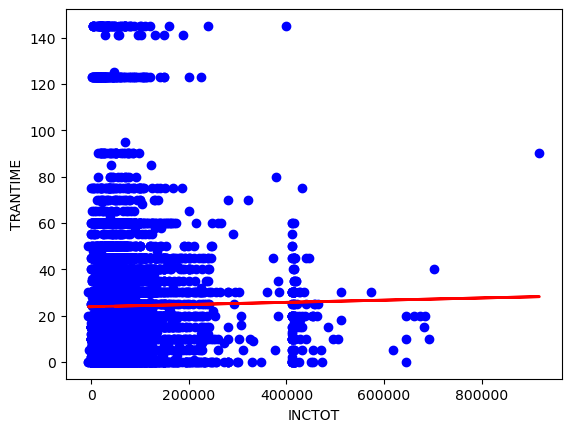

In [36]:
X = df[['INCTOT']] # independent variable
y = df[['TRANTIME']] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('MSE:', mse)

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('INCTOT')
plt.ylabel('TRANTIME')
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df[['INCTOT']] # independent variable
y = df[['TRANTIME']] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       844
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        89
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00       764
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00       117
           8       0.00      0.00      0.00        99
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00      1163
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00       114
          13       0.00      0.00      0.00        24
          14       0.00      0.00      0.00        14
          15   

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe